# 探索的データ分析とは

データ分析のアプローチは仮説をデータで検証する「仮説検証型」とデータから仮説を生み出す「探索型」の2つがある。  
二つを行き来しつつ知見を見出していく。  


データ解析には検証すべき仮説（目的）を設定することが必要だが、仮説を持てない場合も多いので、まず仮説を作る為にデータ解析をする必要がある。  
そこで探索的データ分析を行う。

# 探索的データ解析の基礎概念

探索的データ解析を行うにあたって意識する3つの概念がある。

**可視化**  
データの性質や傾向が不明であるという前提に立ち、可視化に重点を置く  
よく使う手法はヒストグラム(比較対象が少ない場合)、箱ひげ図(比較対象が多い場合)、散布図など  

**再表現**  
データに何らかの変換や計算を用いて理解しやすくしたり、違った側面から見られるようにする  
データや目的によっては不適切な手法適用もあるので注意が必要

**抵抗性**  
統計量などが外れ値に影響されにくい性質  
データが想定している性質に沿わない時にどれくらい影響されにくいかという**頑健性**も大事

# 探索的データ解析の基本的な取り組み方

上記基礎概念を元に、次の6つのアプローチを行う。  

1. **データの分布を見る**  
分布を把握することで、正しい現状認識が可能になり、曖昧な認識を補強したり想定とのズレを修正することが出来る  
複数の図を比較することもある  
得られた知見の原因を考えることで仮説を立てていく  
よく使う手法はヒストグラムや箱ひげ図  

2. **データとの関係性を見る**  
変数間の関係を把握することで、目的変数にどの変数がどの程度影響を及ぼしているのかを知ることが出来る  
想定する変数が影響を与えているか、他の変数が影響していないか、また変数同士の優先順位を確認する  
よく使う手法は散布図や相関分析  

3. **データを縮約する**  
**データ縮約**という  
データの平均や合計を出すことで特徴や傾向を一目で読み取れるようにする  

4. **データを層別にする**  
**スライシング**という  
データを様々な軸の水準で区切り、層別にすることで、意味付けした各層ごとにデータの特徴を把握することが出来る  
ヒストグラムが一つの変数の把握に用いるのに対し、スライシングは一つの変数を軸に他の変数がどうなるかを把握する  

5. **データを詳細化する**  
**ドリルダウン**という  
データを様々な軸で詳細化することで、全体と部分との比較をすることができる  

6. **データを時系列で見る**  
データを時系列で並べてその変化を見ることで、時系列の変化を把握する  
よく使う手法は折れ線グラフ  

# 探索的データ分析における可視化手法

1. データの分布をみる 
    1. 変数が連続  
        * 比較対象が無いor少ない: ヒストグラム  
        * 比較対象が多い: 箱ひげ図  
    2. 変数が離散
        * 大きさの比を見る: 棒グラフ  
        * 内訳を見る: 帯グラフ  
        * 大きさの比とその内訳を見る: 積み上げ棒グラフ  
2. データの関係をみる 　
    * 変数が連続: 散布図  
    * 変数が離散: クロス集計/ヒートマップ  
3. データの推移をみる  
    * 傾きの増減とその程度をみる: 折れ線グラフ  
    * 推移の方向と分布をみる: ロウソク足チャート  

データを可視化する様々な方法と用途をまとめる。  
具体例として、irisデータを用いる。

irisはアヤメです。  
“setosa”, “versicolor”, “virginica” という 3 種類の品種のアヤメのがく片 (Sepal)、花弁 (Petal) の幅および長さを計測したデータです。  

![iris](images/flower_ayame.png)

In [33]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display

sns.set_context('talk')
pd.set_option('display.max_colwidth', 0)
sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'IPAPGothic'
plt.rcParams['font.size'] = 18

%matplotlib inline

In [2]:
# 今回使うサンプルデータ
iris=sns.load_dataset("iris")

In [3]:
# データの行列数
iris.shape

(150, 5)

In [4]:
# データの上5行
display(iris.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# データの分布を見る

## 変数が連続

### 比較対象が無いor少ない: ヒストグラム

データの特徴を把握するのに使う。  
例えば、データにどの程度バラツキがあるのか、どの範囲にデータが集まっているのか、ある範囲のデータの個数はどの程度か、などが挙げられる。  
ヒストグラムは比較対象が少ない場合、箱ひげ図は比較対象が多い場合に用いる。  
ヒストグラムが多峰な場合、クラスタリングの必要があることがわかる。  

がくの長さのヒストグラムを書いてみます。

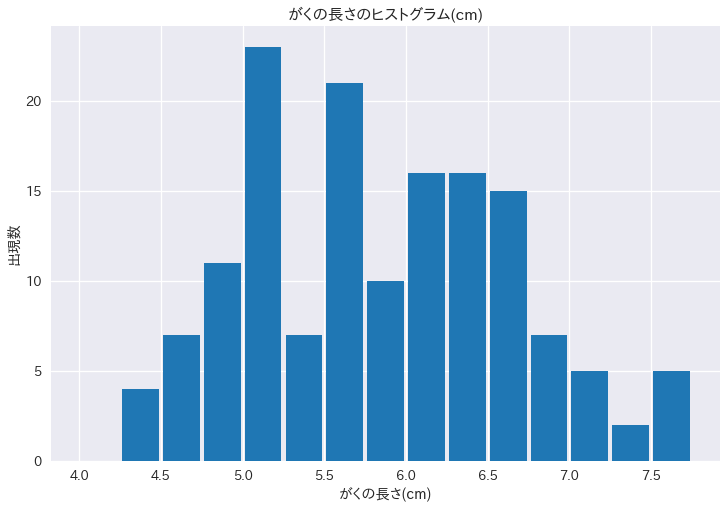

In [5]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.hist(x=iris["sepal_length"],
        bins=np.arange(4, 8, 0.25),
        range=(4, 8),
       rwidth=0.9)

ax.set_title("がくの長さのヒストグラム(cm)")
ax.set_xlabel("がくの長さ(cm)")
ax.set_ylabel("出現数")

plt.savefig("outputs/histgram.png")

plt.show()



がくの長さは4.25cm~7.5cmの間に分布していることがわかる。  
分布の偏りはないが、山が3つあることがわかります(多峰)。  
上のヒストグラムは全ての品種を同時にプロットしたので、試しに品種ごとにグループ化してみる。

In [9]:
setosa = iris[iris.species=="setosa"]
versicolor = iris[iris.species=="versicolor"]
virginica = iris[iris.species=="virginica"]

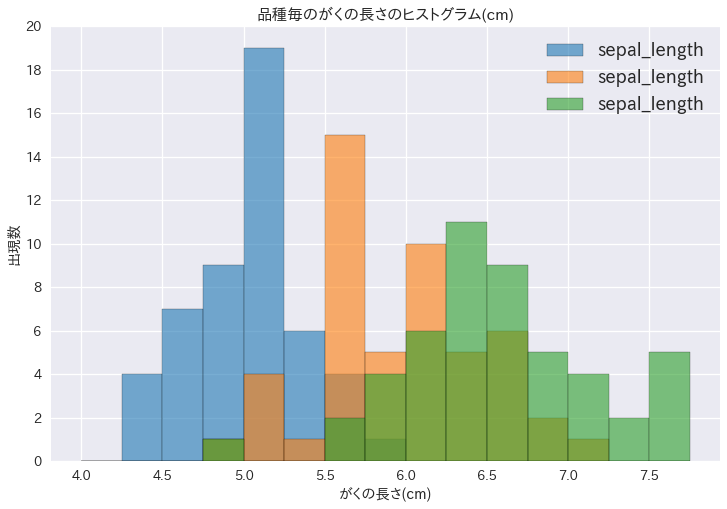

In [18]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.hist(x=setosa["sepal_length"], bins=np.arange(4, 8, 0.25), alpha=0.6, ec="black")
ax.hist(x=versicolor["sepal_length"], bins=np.arange(4, 8, 0.25), alpha=0.6, ec="black")
ax.hist(x=virginica["sepal_length"], bins=np.arange(4, 8, 0.25), alpha=0.6, ec="black")

ax.set_title("品種毎のがくの長さのヒストグラム(cm)")
ax.set_xlabel("がくの長さ(cm)")
ax.set_ylabel("出現数")
ax.set_yticks([i * 2 for i in range(11)])

ax.legend(prop={'size': 18})

plt.savefig("outputs/histgram_grouped.png")

plt.show()

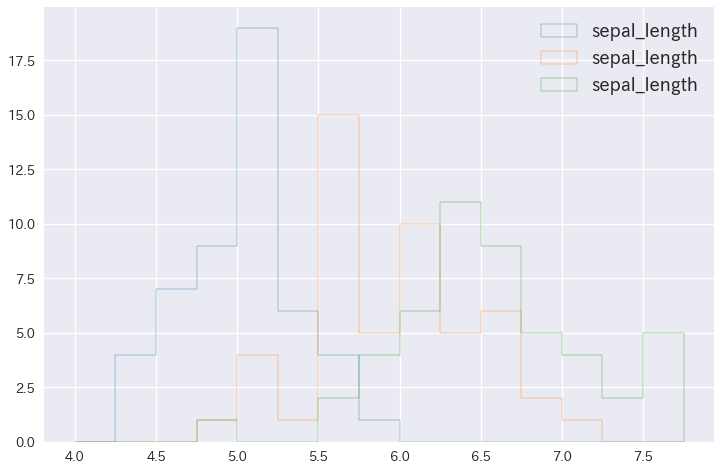

In [12]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.hist(x=setosa["sepal_length"], bins=np.arange(4, 8, 0.25), histtype="step")
ax.hist(x=versicolor["sepal_length"], bins=np.arange(4, 8, 0.25), histtype="step")
ax.hist(x=virginica["sepal_length"], bins=np.arange(4, 8, 0.25), histtype="step")

ax.legend(prop={'size': 18})

plt.savefig("outputs/histgram_grouped.png")

plt.show()


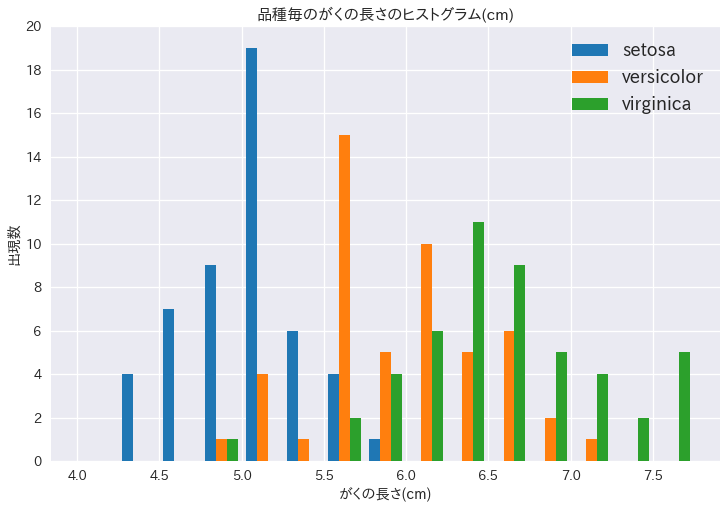

In [6]:
# 入れ子のリストを作成してから描画すると、複数グループを横に並べたヒストグラムが出来る
data = [iris.loc[iris["species"]==s, "sepal_length"] for s in iris["species"].drop_duplicates()]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.hist(x=data,
        bins=np.arange(4, 8, 0.25),
        label=iris["species"].drop_duplicates(),
        range=(4, 8))

ax.set_title("品種毎のがくの長さのヒストグラム(cm)")
ax.set_xlabel("がくの長さ(cm)")
ax.set_ylabel("出現数")
ax.set_yticks([i * 2 for i in range(11)])

ax.legend(prop={'size': 18})

plt.savefig("outputs/histgram_grouped.png")

plt.show()



多峰になっていた原因が主に品種による偏りであることがわかります。  
setosaは5.0付近、versicolorは5.5付近、virginicaは6.5付近にデータが集まっています。  
virginicaのデータの散らばりが大きくてsetosaの散らばりが小さいように見えますが、見かけのデータの散らばりは平均値が大きくなればなるほど大きくなっていくので注意が必要です。  
versicolorが5.5, 6.0, 6.5に山があったり、virginicaが7.75で分布が増えているのが気になります。

### 比較対象が多い: 箱ひげ図

ヒストグラムは分布の状態を詳しく分析することができますが、これ以上比較対象が増えると複数のヒストグラムを並べて同時に比較するのが難しくなります。  
そこで、箱ひげ図を使ってたくさんの対象を同時に比較します。

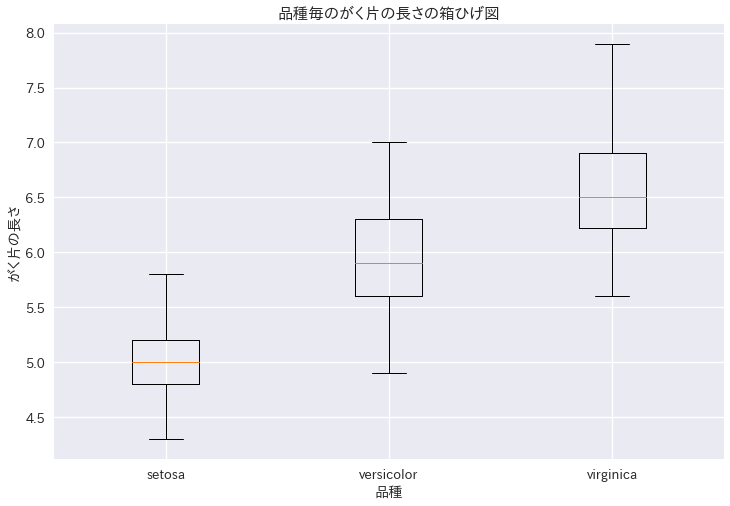

In [20]:
labels = []
species_list = []

# 品種ごとのがくの長さをリスト化
for s, df_per_s in iris.groupby(by="species"):
    labels.append(s)
    species_list.append(df_per_s["sepal_length"].tolist())


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.boxplot(x=species_list,
          labels=labels)

ax.set_title("品種毎のがく片の長さの箱ひげ図")
ax.set_xlabel("品種")
ax.set_ylabel("がく片の長さ")

plt.savefig("outputs/boxplot.png")

plt.show()

setosaやversicolorに比べてvirginicaが上に裾野が長いことがわかります。  
箱ひげ図はたくさんの対象を同時に比較しやすい一方で、ヒストグラムでは見えたversicolorの多峰性が見えなくなるなど対象一つあたりの情報量は減ってしまいます。 

## 変数が離散

### 大きさの比を見る: 棒グラフ

各項目の大きさを比べるのに使う。  
比の関係を知りたいので、縦軸の値の一部を省略してはいけない。  

品種ごとにがく片の長さの大きさの比を見てみます。

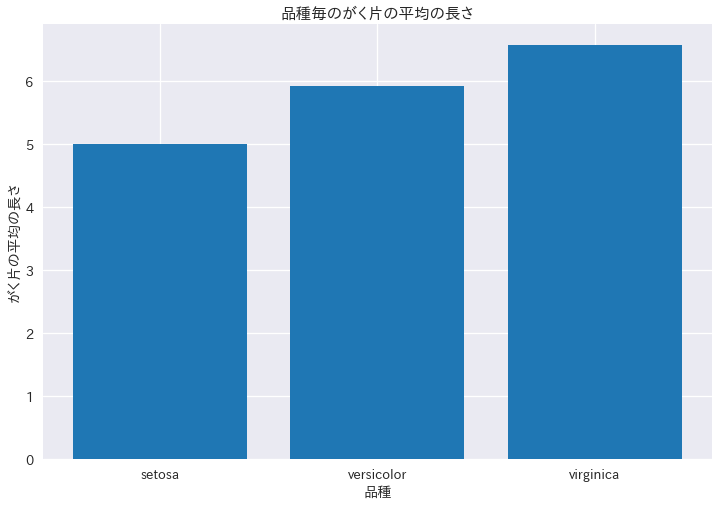

In [21]:
data = iris.groupby(by=["species"], as_index=False)[["species", "sepal_length"]].mean()

# 描画する枠figを指定
fig = plt.figure(figsize=(12, 8))
# 描画領域を1行1列に分割し、そのうちの1番目の分割領域をaxとする
ax = fig.add_subplot(111)
# axに棒グラフを描画
ax.bar(x=data.species, height=data.sepal_length)

ax.set_title("品種毎のがく片の平均の長さ")
ax.set_xlabel("品種")
ax.set_ylabel("がく片の平均の長さ")

plt.savefig("outputs/barplot.png")

plt.show()

上の棒グラフを見ると、setosaに比べてversicolorのがくは約1.2倍、virginicaは約1.3倍長いことがわかります。  

###  内訳を見る: 帯グラフ

内訳の割合を見るために使う。  

irisに含まれる品種の出現数を調べてみる

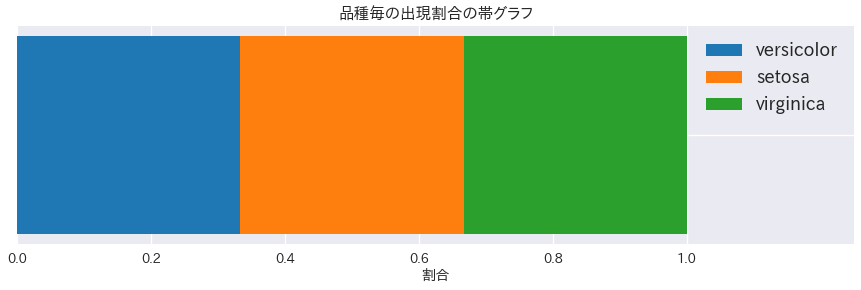

In [312]:
# matplotlibには帯グラフを描画する関数が無い
# 積み上げ棒グラフを合計値が1になるよう正規化する

s_counts = iris["species"].value_counts()
s_normed = s_counts / s_counts.sum()

bottom = 0

fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)

for s in range(s_normed.shape[0]):
    ax.barh([""], s_normed[s], left = bottom, label = s_normed.index[s]) # barh()ならleft, bar()ならbottomを指定
    bottom += s_normed[s]
    
ax.set_title("品種毎の出現割合の帯グラフ")
ax.set_xlabel("割合")
legend = ax.legend(prop={'size': 18})

# legendの背景を白にしたいんだけどうまく動かない
legend.get_frame().set_facecolor("white")

# 代わりにXの右側のマージンを広くとる
ax.set_xlim(0, 1.25)
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.savefig("outputs/bandgraph.png")

plt.show()

出現数が3等分されていることがわかる

帯グラフの描画で参考にしたサイト  
[matplotで帯グラフ](https://qiita.com/yu4u/items/89bf0127ed340c026290)  
[Stacked Bar Graph](https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html)  
[api example code: legend_demo.py](https://matplotlib.org/examples/api/legend_demo.html)

In [207]:
iris_pivoted

species,setosa,versicolor,virginica
rank,,,
short,28.0,3.0,1.0
medium,22.0,47.0,37.0
long,NaN,NaN,12.0


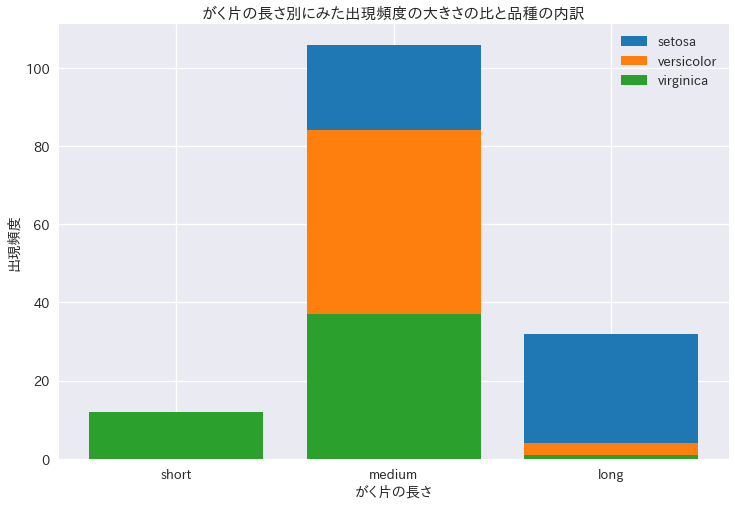

In [209]:
# irisデータにrank列を付与
ranks = ["short", "medium", "long"]
iris["rank"] = pd.cut(iris["sepal_length"], [4, 5, 7, 8], labels = ranks)

#  rankと品種で集計、ピボットテーブル化
iris_grouped = iris.groupby(["rank", "species"]).size().reset_index()
iris_pivoted = iris_grouped.pivot(index="rank", columns="species", values=0)

# 描画

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

rows, cols = iris_pivoted.shape[0], iris_pivoted.shape[1]
x = iris_pivoted.index

for i, s in enumerate(iris_pivoted.columns):
    # i列目から最終列までの和を計算
    y = iris_pivoted.iloc[:, i:cols].sum(axis=1)
    
    ax.bar(x, y, label=s)

ax.set_title("がく片の長さ別にみた出現頻度の大きさの比と品種の内訳")
ax.set_xlabel("がく片の長さ")
ax.set_xticks(["short", "medium", "long"])
ax.set_ylabel("出現頻度")
ax.legend()

plt.savefig("outputs/stacked_barchart.png")

plt.show()

### 大きさとその内訳を見る: 積み上げ棒グラフ

棒グラフと帯グラフを合体させたグラフ。  
複数のデータの大きさの比とその内訳を同時に表現するときに使う。

主に複数の変数をもつ時系列のデータに使われるが、今回はirisのがくの長さを短(4~5cm)中(5~7cm)長(7~8cm)で分割する。  
グループ間の出現数の比と各グループの品種の内訳をみる

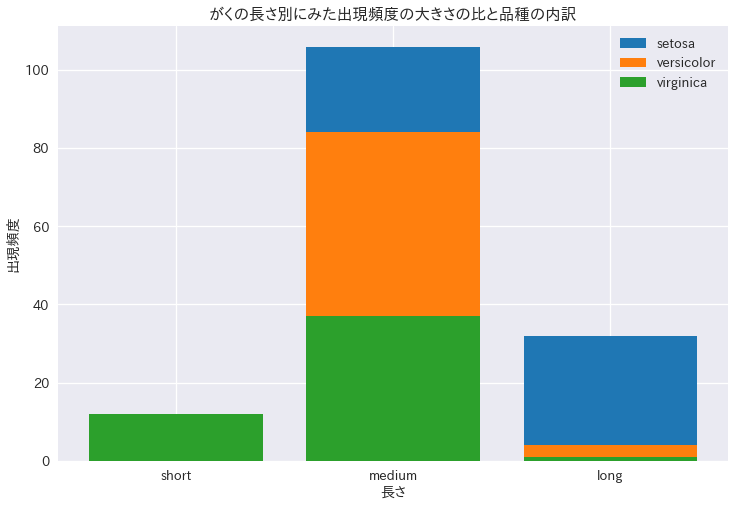

In [314]:
# irisデータにrank列を付与
ranks = ["short", "medium", "long"]
iris["rank"] = pd.cut(iris["sepal_length"], [4, 5, 7, 8], labels = ranks)

#  rankと品種で集計、ピボットテーブル化
iris_grouped = iris.groupby(["rank", "species"]).size().reset_index()
iris_pivoted = iris_grouped.pivot(index="rank", columns="species", values=0)

# 描画

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

rows, cols = iris_pivoted.shape[0], iris_pivoted.shape[1]
x = iris_pivoted.index

for i, s in enumerate(iris_pivoted.columns):
    # i列目から最終列までの和を計算
    y = iris_pivoted.iloc[:, i:cols].sum(axis=1)
    
    ax.bar(x, y, label=s)

ax.set_title("がくの長さ別にみた出現頻度の大きさの比と品種の内訳")
ax.set_xlabel("長さ")
ax.set_xticks(["short", "medium", "long"])
ax.set_ylabel("出現頻度")
ax.legend()

plt.savefig("outputs/stacked_barchart.png")

plt.show()

/Users/uchide/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


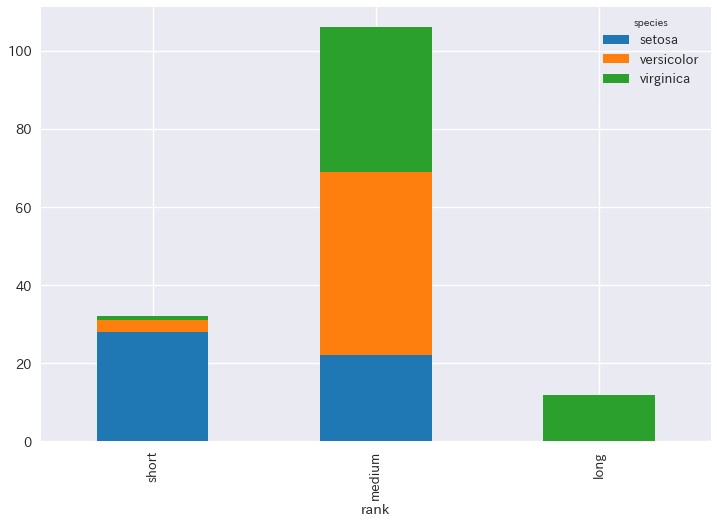

In [277]:
# Pandas plotを使った方がはるかに楽
iris_pivoted.plot.bar(y=["setosa", "versicolor", "virginica"], figsize=(12, 8), stacked=True)

mediumが一番多くて、longが一番少ない。  
shortはsetosa、mediumはversicolor、longはvirginicaの割合が多いことがわかる。  

# データの関係を見る

## 量的変数の関係を見る: 散布図

二つの量的変数の関係を見るのに使う。  
正の相関、負の相関や、その強弱を見る。  

例えば、irisのがくと花弁の関係を見たいとする。

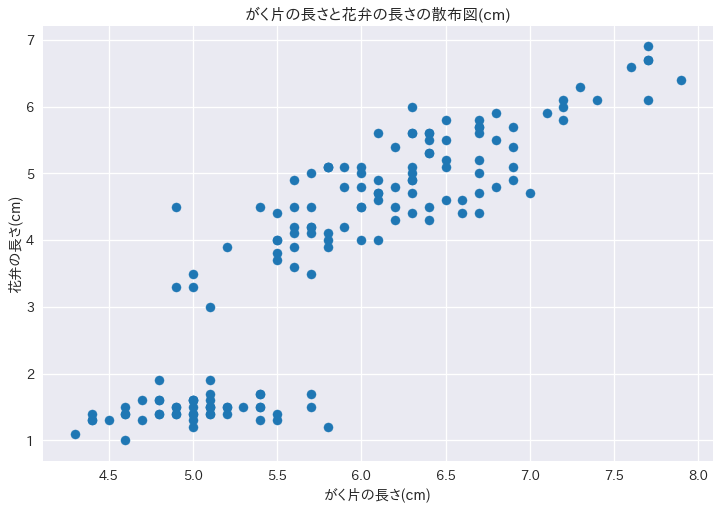

In [23]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.scatter(iris["sepal_length"],
          iris["petal_length"])

ax.set_title("がく片の長さと花弁の長さの散布図(cm)")
ax.set_xlabel("がく片の長さ(cm)")
ax.set_ylabel("花弁の長さ(cm)")

plt.savefig("outputs/scatter.png")

plt.show()

がくの長さと花弁の長さに正の相関があることがわかる

クラス毎に集計することもできる

In [10]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

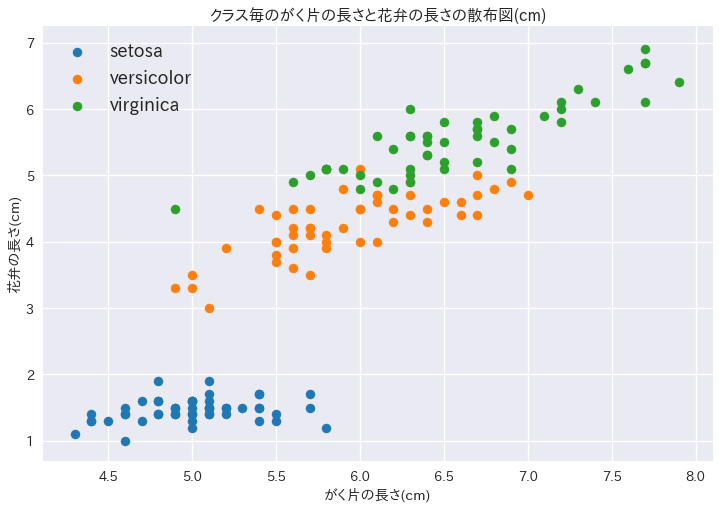

In [319]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

for s in iris["species"].unique():
    ax.scatter(iris.loc[iris["species"] == s, "sepal_length"],
              iris.loc[iris["species"] == s, "petal_length"])

ax.set_title("クラス毎のがく片の長さと花弁の長さの散布図(cm)")
ax.set_xlabel("がく片の長さ(cm)")
ax.set_ylabel("花弁の長さ(cm)")

ax.legend(iris["species"].unique(), prop={'size': 18})

plt.savefig("outputs/scatter_grouped.png")

plt.show()

クラス毎に見たところ、versicolorとvirginicaではがくの長さと花弁の長さに正の相関がある一方で、setosaには相関が無いことがわかる。

複数の変数の関係を同時に見たいときは散布図行列を書きます。  

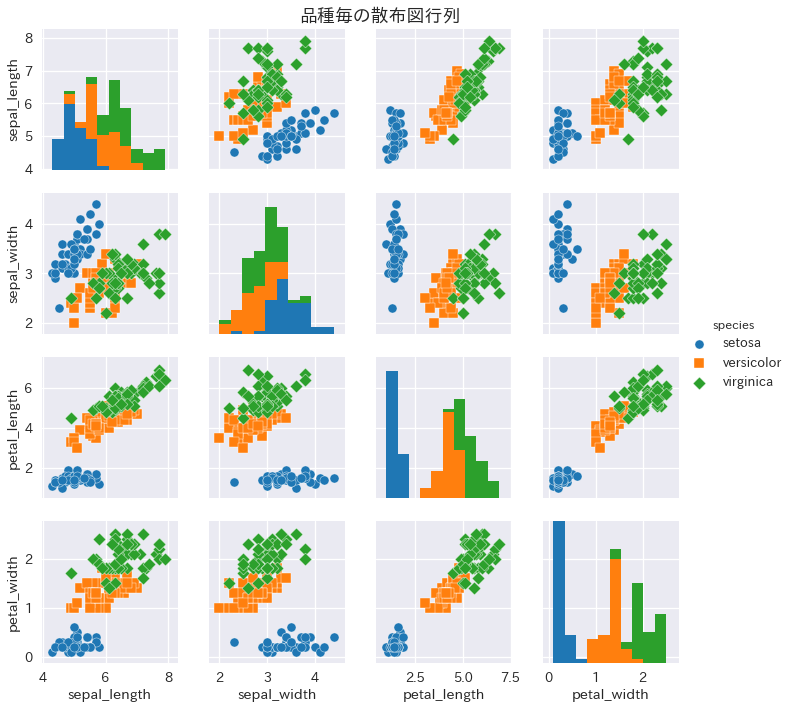

In [320]:
g = sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.subplots_adjust(top=0.95)
g.fig.suptitle("品種毎の散布図行列", fontsize=18)

g.savefig("outputs/scatter_plots_matrix.png")

setosaは長さも幅もがくと花弁の間に相関はないことがわかる。  
versicolorは長さも幅も正の相関があることがわかる。長さの相関は強いが幅の相関は弱い。  
virginicaは長さも幅も正の相関があることがわかる。長さの相関は強いが幅の相関は弱い。  

## 質的変数の関係を見る: クロス集計とヒートマップ

一方、あるいは両方に質的変数を含む変数同士の関係を見るときに使う。  
ヒートマップはクロス集計のセルが多いときに威力を発揮する。  

今回はflightsというデータを使います。  
これは、1949年から1960年において、ある航空会社の乗客数の推移を表したデータです。

In [190]:
flights = sns.load_dataset("flights")

In [26]:
flights.shape # データの行数, 列数

(144, 3)

In [27]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [28]:
# クロス集計
flights_crossed = pd.pivot_table(flights, values="passengers", index="month", columns="year", aggfunc=np.mean)  
# pd.crosstab(flights["month"], flights["year"], values=flights["passengers"], aggfunc=np.mean)でも可
flights_crossed

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


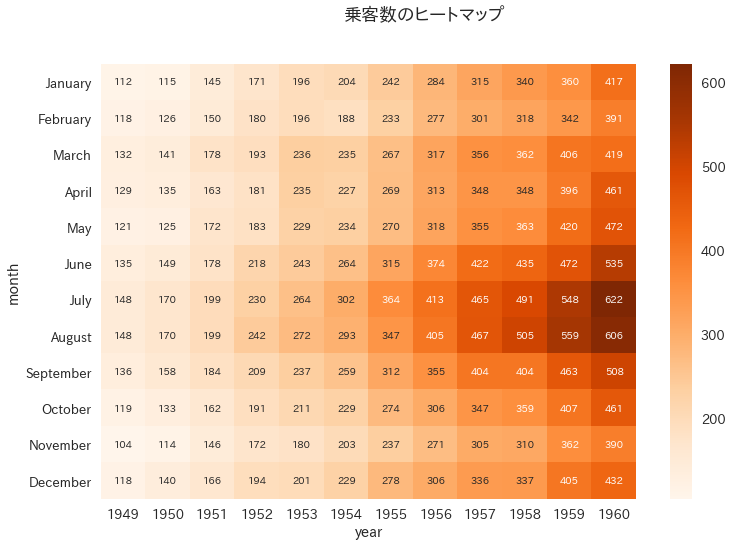

In [39]:
# ヒートマップ
fig = plt.figure(figsize=(12, 8))
g = sns.heatmap(flights_crossed, annot=True, cmap="Oranges", fmt='.5g')
g.figure.suptitle("乗客数のヒートマップ", fontsize=18)

g.figure.savefig("outputs/heatmap.png")

乗客数は1960年の7月が最も多いことがわかります。
また、冬より夏、1949年より1960年に近づくほど乗客数が多いことがわかります。

参考  
[Python でデータ可視化 - カッコいいヒートマップを描こう](https://qiita.com/hik0107/items/67ad4cfbc9e84032fc6b)

## 時系列データを見る: 折れ線グラフ

主に時系列変化を見るのに使う。  
折れ線の傾きによって増減の有無とその度合いを一覧する。  
変化の程度を見ることが目的なので、縦軸の値を省略しても壊れる心配がないため、省略しても構わない。  
ただし、折れ線グラフを棒グラフの代わりに使っている場合は省略してはいけない。

irisは時系列データでは無いので、今回もflightsを使う。

前処理

In [185]:
# 日付型を扱うモジュールのインポート
from datetime import datetime, date

# year列とmonth列を結合
flights["year_month"] = flights["year"].astype(str) + flights["month"].astype(str)

# year_month列を文字型からdate型に変換
for i in range(flights.shape[0]):
    dt = datetime.strptime(flights.loc[i, "year_month"], "%Y%B") # strオブジェクトをtimeオブジェクトに変換(年-月-日 時:分:秒)
    d = date(dt.year, dt.month, dt.day) # timeオブジェクトをdateオブジェクトに変換(年-月-日)
    flights.loc[i, "year_month"] = d #dateオブジェクトをflightsに戻す

日付型処理で参考にしたサイト  
[datetimeモジュール](http://docs.python.jp/2/library/datetime.html)  
[Pythonで文字列 <-> 日付(date, datetime) の変換](https://qiita.com/shibainurou/items/0b0f8b0233c45fc163cd)  
[Python文字列操作マスター](https://qiita.com/tomotaka_ito/items/594ee1396cf982ba9887)  
[pandas.DataFrameの複数の列の文字列を結合して新たな列を生成](https://note.nkmk.me/python-pandas-str-combine/)

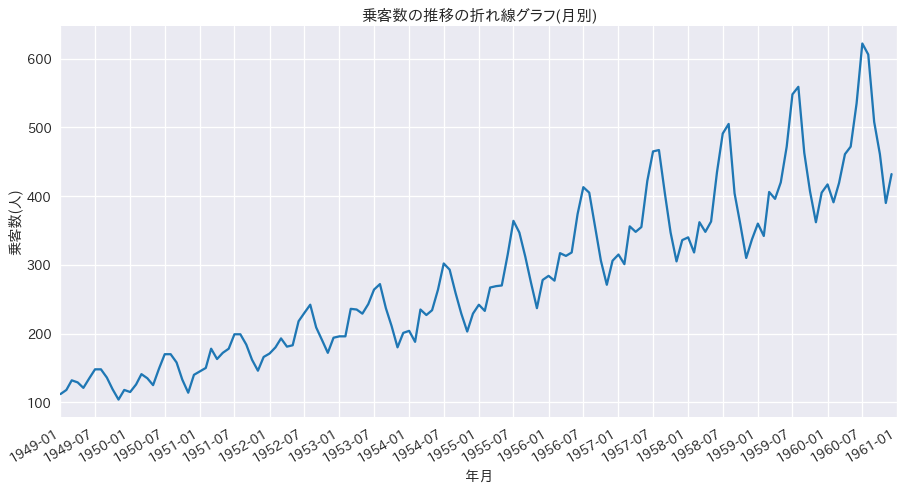

In [186]:
from matplotlib.dates import MonthLocator, DateFormatter

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.plot(flights["year_month"], flights["passengers"])

# date型の表示形式を指定するインスタンス
monthsFmt = DateFormatter("%Y-%m")

# 月毎の区切りを指定するインスタンス
months = MonthLocator(interval=6)

ax.set_title("乗客数の推移の折れ線グラフ(月別)")
ax.set_xlabel("年月")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

# X軸の範囲の設定
datemin = date(1949, 1, 1)
datemax = date(1961, 1, 1)
ax.set_xlim(datemin, datemax)

ax.set_ylabel("乗客数(人)")

# X軸の表示(date型)をよしなに整える
fig.autofmt_xdate()

plt.savefig("outputs/linegraph.png")

plt.show()

年月で参考にしたサイト  
[pylab_examples example code: date_demo2.py¶](https://matplotlib.org/examples/pylab_examples/date_demo2.html)  
[Date tick labels](https://matplotlib.org/gallery/api/date.html)

時系列データは、大きく分けてトレンド、季節性、ノイズに区別されます。  
上の図を見ると、トレンドは上昇傾向にあり、上昇の度合いがやや増していることがわかります。 
季節性は1年単位の周期で、夏にかけて乗客数が上昇し、冬にかけて乗客数が下降しています。また、1月と3月にも小さい上昇が見られます。  

日付型の扱いが辛い、、

## 時系列のデータの変化と分布を見る: ロウソク足チャート

主に金融業界で使われるグラフ  
本来は株価の4本値(始値・高値・安値・終値)を時系列に沿って描画するために使う。  
一つ一つのロウソク足を箱ひげと見なす事で、時系列に沿って分布を表現することも出来る。  

月ごとに集計されている乗客数のデータを、年毎にまとめて表現する。

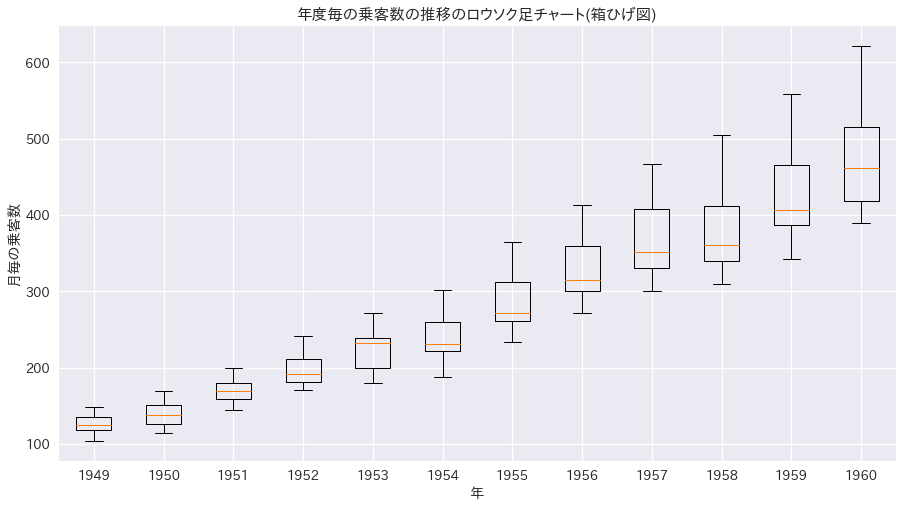

In [93]:
years = []
passengers_list = []


for y, df_per_y in flights.groupby(by="year"):
    years.append(y)
    passengers_list.append(df_per_y["passengers"].tolist())


fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.boxplot(x=passengers_list,
          labels=years)

ax.set_title("年度毎の乗客数の推移のロウソク足チャート(箱ひげ図)")
ax.set_xlabel("年")
ax.set_ylabel("月毎の乗客数")

plt.savefig("outputs/candlestick_chart.png")

plt.show()

年によって乗客数の中央値の位置に偏りがあることがわかります。  
基本的に乗客数は上に裾野が広い分布になっていますが、1953年だけ中央値が高く下に裾野が広くなっています。  
折れ線グラフで確認すると、1953年は3月-6月の乗客数が例年と比べ増えていることがわかりました。  

参考  
[Pythonでローソク足チャートの表示（matplotlib編）](https://qiita.com/toyolab/items/1b5d11b5d376bd542022)  

In [191]:
# 日付型を扱うモジュールのインポート
from datetime import datetime, date

# year列とmonth列を結合
flights["year_month"] = flights["year"].astype(str) + flights["month"].astype(str)

# year_month列を文字型からdate型に変換
for i in range(flights.shape[0]):
    dt = datetime.strptime(flights.loc[i, "year_month"], "%Y%B") # strオブジェクトをtimeオブジェクトに変換(年-月-日 時:分:秒)
    d = date(dt.year, dt.month, dt.day) # timeオブジェクトをdateオブジェクトに変換(年-月-日)
    flights.loc[i, "year_month"] = d #dateオブジェクトをflightsに戻す

In [192]:
# 年ごとに、最小値、25%点、75%点、最大値を求める
for y, df_per_year in flights.groupby("year"):
    flights.loc[flights.year == y, "min"] = np.percentile(df_per_year.passengers, 0)
    flights.loc[flights.year == y, "25%"] = np.percentile(df_per_year.passengers, 25)
    flights.loc[flights.year == y, "75%"] = np.percentile(df_per_year.passengers, 75)
    flights.loc[flights.year == y, "max"] = np.percentile(df_per_year.passengers, 100)

# 毎年1月のデータだけを抜き出す
flights_year = flights.groupby("year", as_index=False).head(1)

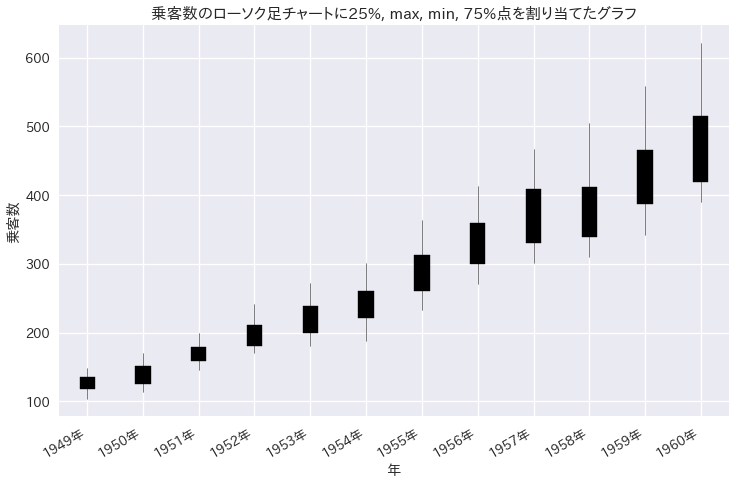

In [208]:
import matplotlib.finance as mpf
from matplotlib.dates import date2num, DateFormatter, YearLocator
import matplotlib.ticker as ticker
from datetime import datetime


# 年で表記する
yformat = DateFormatter("%Y年")

# 1年単位で区切る
ylocator = YearLocator()

# ローソク足チャートの描画
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot()

#  描画に必要なデータを揃える
# ローソク足チャートで日付を表示させるには、date2numでdate型をnumに変換する必要がある
ohlc = np.vstack((date2num(flights_year["year_month"]), flights_year[["25%", "max", "min", "75%"]].values.T)).T

# ローソク足チャートの描画
mpf.candlestick_ohlc(ax, ohlc, width=100, colorup='black')

# X軸の範囲の設定
datemin = date(1948, 7, 1)
datemax = date(1960, 7, 1)
ax.set_xlim(datemin, datemax)

# X軸の表記と区切りの設定
ax.xaxis.set_major_formatter(yformat)
ax.xaxis.set_major_locator(ylocator)

# タイトル等々の設定
ax.set_title("乗客数のローソク足チャートに25%, max, min, 75%点を割り当てたグラフ")
ax.set_xlabel("年")
ax.set_ylabel("乗客数")

fig.autofmt_xdate() #x軸のオートフォーマット

plt.savefig("outputs/chandestick.png")

plt.show()

# 使うべきではない可視化手法

* 円グラフ  
* 3Dグラフ  
* メモリがないグラフ

## 円グラフ

内訳の構成比を円の弧・面積で表すグラフ。  
人間は長さと比べ面積の大小を把握しにくい。また各要素が円状に並んでいるため大きさを比較しづらい。  
割合を表したいのなら帯グラフや積み上げ棒グラフを使うべき。

In [292]:
# irisを品種ごとに数え上げる
iris_counted = iris.groupby("species").size().reset_index().rename(columns={0: "freq"})

# データに偏りを持たせてみる
iris_counted.loc[0, "freq"] += 5

iris_counted

,species,freq
0,setosa,55
1,versicolor,50
2,virginica,50


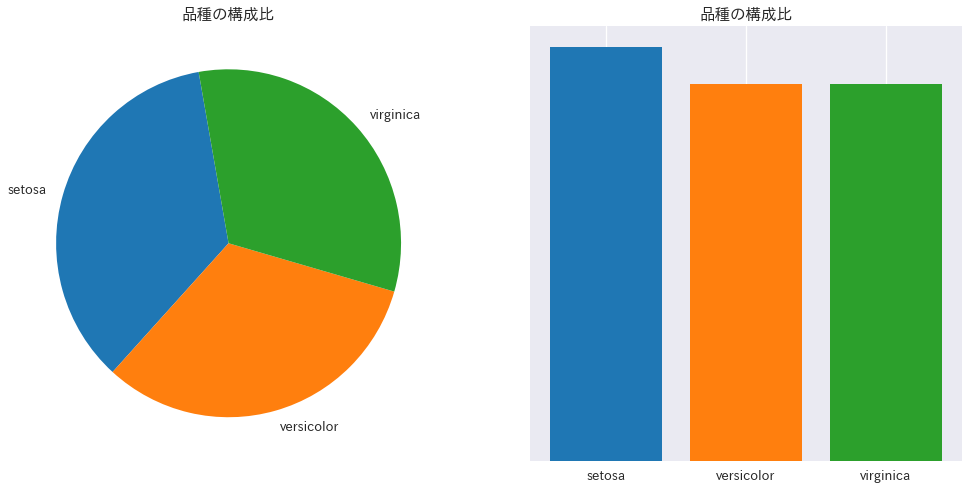

In [335]:
# デフォルトのカラーマップを選択
cmap = plt.get_cmap("tab10")

# 描画
fig = plt.figure(figsize=(17, 8))

# 円グラフ
ax1 = fig.add_subplot(121)
ax1.pie(iris_counted["freq"], labels=iris_counted["species"], startangle=100)

ax1.set_title("品種の構成比")

# 棒グラフ
ax2 = fig.add_subplot(122)
ax2.bar(iris_counted["species"], iris_counted["freq"], color=[cmap(0), cmap(1), cmap(2)])

ax2.set_title("品種の構成比")
ax2.set_yticks([])

plt.savefig("outputs/pie_bar.png")

plt.show()

setosaという品種の出現割合が多い事がわかりづらい。

棒グラフで描画するとsetosaの出現数が多い事がわかる

## 3Dグラフ

見た目のインパクトが大きいのでよく使われる。  
手前のオブジェクトで奥のオブジェクトが隠れてしまったり、角度によって受ける印象が変わってしまう。  

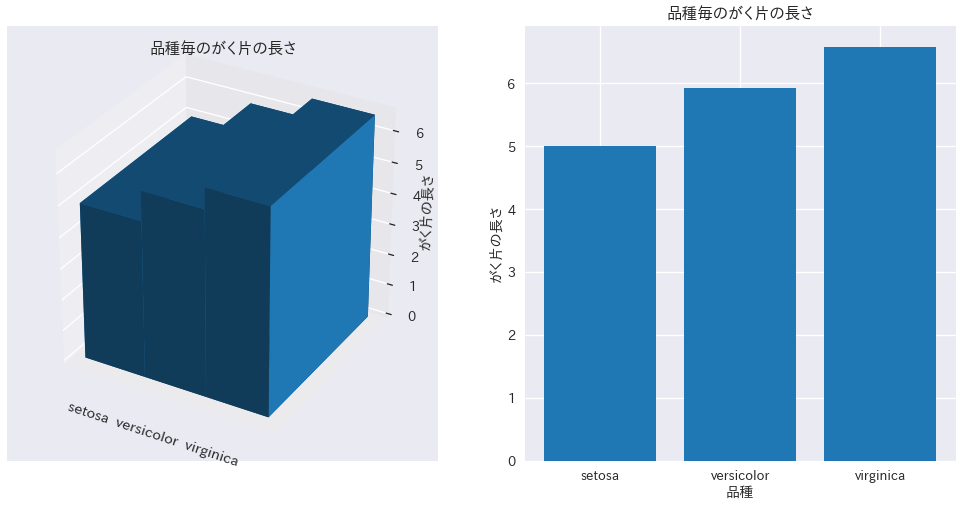

In [342]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = iris.groupby(by=["species"], as_index=False)[["species", "sepal_length"]].mean()
x = [0, 1, 2]
y = [0]
bottom = np.zeros(3)
width = depth = 1
top = data["sepal_length"]

# setup the figure and axes
fig = plt.figure(figsize=(17, 8))
ax1 = fig.add_subplot(121, projection="3d")
ax1.bar3d(x, y, bottom, width, depth, top, shade=True)

ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel("setosa  versicolor  virginica")

ax1.set_title("品種毎のがく片の長さ")
ax1.set_zlabel("がく片の長さ")

ax2 = fig.add_subplot(122)
ax2.bar(x=data.species, height=data.sepal_length)

ax2.set_title("品種毎のがく片の長さ")
ax2.set_xlabel("品種")
ax2.set_ylabel("がく片の長さ")

plt.savefig("outputs/3dbar_bar.png")

plt.show()

参考  
[Demo of 3D bar charts](https://matplotlib.org/devdocs/gallery/mplot3d/3d_bars.html)

3D棒グラフと2D棒グラフを比べると、3Dの方がvirginicaのがくの長さが長く見える

## 目盛がないグラフ

目盛りの上限・下限・幅などを変えることで印象を変えることが出来てしまう。  
スパークラインや一部の折れ線グラフを除けば、目盛は必ず付与するべき。

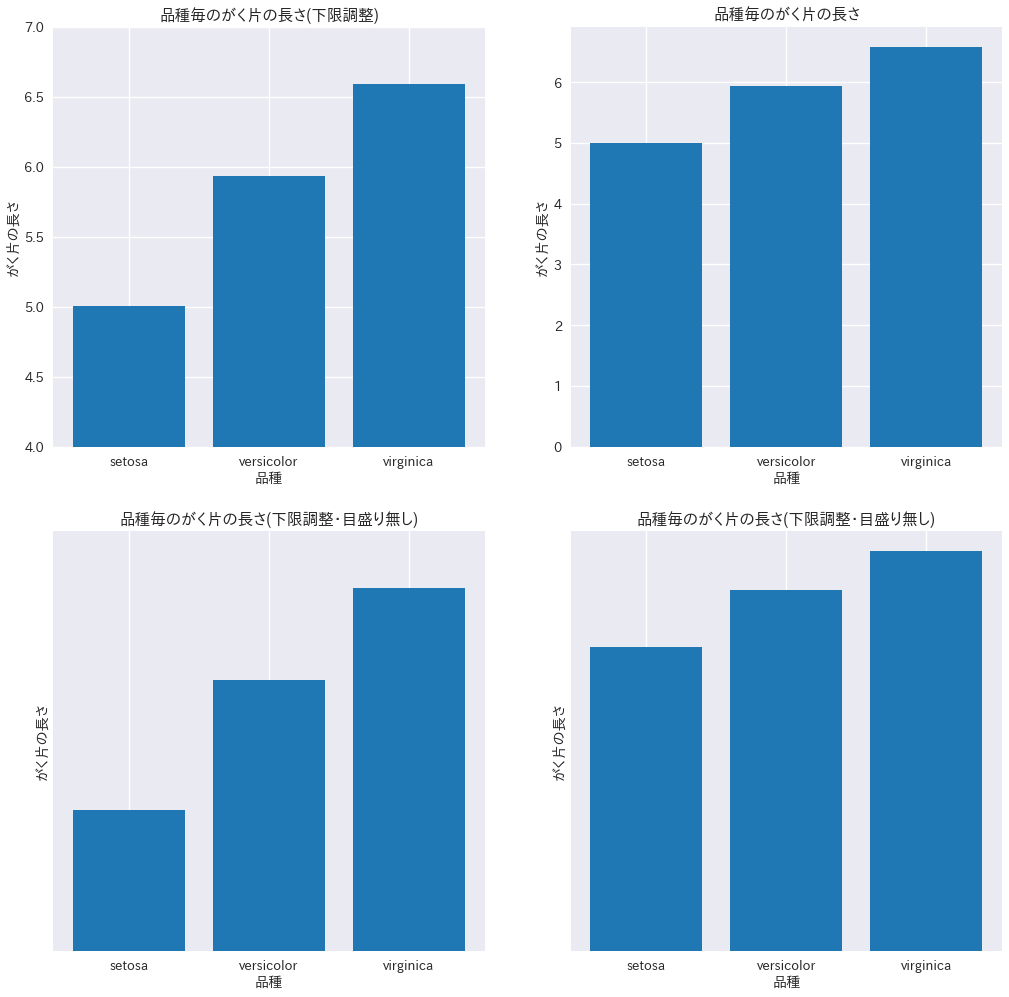

In [347]:
data = iris.groupby(by=["species"], as_index=False)[["species", "sepal_length"]].mean()

fig = plt.figure(figsize=(17, 17))
ax1 = fig.add_subplot(221)
ax1.bar(x=data.species, height=data.sepal_length)

ax1.set_title("品種毎のがく片の長さ(下限調整)")
ax1.set_xlabel("品種")
ax1.set_ylabel("がく片の長さ")

ax1.set_ylim(4, 7)

ax2 = fig.add_subplot(222)
ax2.bar(x=data.species, height=data.sepal_length)

ax2.set_title("品種毎のがく片の長さ")
ax2.set_xlabel("品種")
ax2.set_ylabel("がく片の長さ")

ax3 = fig.add_subplot(223)
ax3.bar(x=data.species, height=data.sepal_length)

ax3.set_title("品種毎のがく片の長さ(下限調整・目盛り無し)")
ax3.set_xlabel("品種")
ax3.set_ylabel("がく片の長さ")

ax3.set_ylim(4, 7)
ax3.set_yticks([])

ax4 = fig.add_subplot(224)
ax4.bar(x=data.species, height=data.sepal_length)

ax4.set_title("品種毎のがく片の長さ(下限調整・目盛り無し)")
ax4.set_xlabel("品種")
ax4.set_ylabel("がく片の長さ")
ax4.set_yticks([])

plt.savefig("outputs/nonlabel_bar.png")

plt.show()

可視化のパッケージの使い分けはこちらなどを参照  
[Pythonの可視化パッケージの使い分け](https://qiita.com/alchemist/items/544d45480ce9c1ca2c16)

## まとめ